# **Workshop exercise 1 - Sources of Bias**

## **Purpose**

The scope of this exerecise is to familiarize with the COMPAS dataset, explore the data and identify any potential issues related to fairness.

## **Libraries**
We begin by installing the fairness library "fairlearn" and by importing the required libraries.

In [1]:
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 1.9 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Overview of the COMPAS Dataset

The COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) dataset is an influential collection of data related to criminal justice risk assessments, and contains information about criminal defendants, their demographic details and criminal history.
This dataset was derived from Broward County, Florida, encompassing over 7,000 individuals arrested in 2013 and 2014.
It also includes scores predicting the likelihood of re-offending, produced by the COMPAS algorithm developed by Northpointe.



## **Getting the data**
Next, we will download the COMPAS dataset that will be used throughout the exercise.

In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"

# Select specific columns for the dataset
data = pd.read_csv(url)

# Remove identifying and duplicate columns
cols = ['id', 'name', 'first', 'last', 'dob', 'age', 'compas_screening_date','decile_score.1','priors_count.1']
data = data.drop(cols, axis=1)

## **Data Cleaning and Filtering Steps**

Next, we will clean up the dataset from irrelevant cases and outliers. For the COMPAS dataset, we will exclude:


1.  **Charge Date and Arrest Mismatch**: If the charge date of a defendant’s COMPAS-scored crime was not within 30 days of the arrest date, this might indicate potential data quality issues and incorrect offense information.

2.  **Missing COMPAS Case**: For defendants where no corresponding COMPAS case could be found, the recidivism indicator (is_recid) was set to -1 to denote missing or incomplete information.

3.  **Exclusion of Traffic Offenses**: Ordinary traffic offenses (identified by a charge degree of ‘O’), which do not typically result in jail time, are not classified as serious offences and are therefore not in the scope of the COMPAS assessment.

4.  **Filtering for Relevant Cases**: Cases where a clear classification is missing are not relevant for the COMPAS study.

In [4]:
# Filter results to restrict to relevant cases
data = data[(data['days_b_screening_arrest'] <= 30) & (data['days_b_screening_arrest'] >= -30) &
    (data['is_recid'] != -1) & (data['c_charge_degree'] != "O") & (data['score_text'] != 'N/A')]

# Re-index the dataframe
data = data.reset_index(drop=True)

# Print some info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      6172 non-null   object 
 1   age_cat                  6172 non-null   object 
 2   race                     6172 non-null   object 
 3   juv_fel_count            6172 non-null   int64  
 4   decile_score             6172 non-null   int64  
 5   juv_misd_count           6172 non-null   int64  
 6   juv_other_count          6172 non-null   int64  
 7   priors_count             6172 non-null   int64  
 8   days_b_screening_arrest  6172 non-null   float64
 9   c_jail_in                6172 non-null   object 
 10  c_jail_out               6172 non-null   object 
 11  c_case_number            6172 non-null   object 
 12  c_offense_date           5388 non-null   object 
 13  c_arrest_date            784 non-null    object 
 14  c_days_from_compas      

**Key Features of the Dataset**
  
- **Demographic Information**:
	* **sex**: Gender of the individual (e.g., Male, Female)
	* **age_cat**: Age category of the individual (Less than 25, 25-45, Greater than 45)
	* **race**: Racial background of the individual (e.g., African-American, Caucasian)


- **Juvenile and Prior Offenses**:
	* **juv_fel_count**: Number of juvenile felony offenses
	* **juv_misd_count**: Number of juvenile misdemeanor offenses
	*	**juv_other_count**: Number of other juvenile offenses
	* **priors_count**: Number of prior offenses

- **Current Offense Information**:
	* **days_b_screening_arrest**: Days between screening and arrest
	* **c_jail_in**: Date the individual was jailed
	* **c_jail_out**: Date the individual was released from jail
	* **c_case_number**: Case number of the current offense
	* **c_offense_date**: Date of the current offense
	* **c_arrest_date**: Date of the current arrest
	* **c_days_from_compas**: Days from COMPAS assessment to the current offense
	* **c_charge_degree**: Degree of the current charge (e.g., Felony, Misdemeanor)
	* **c_charge_desc**: Description of the current charge

- **Recidivism Information**:
	* **is_recid**: Indicator of whether the individual recidivated (1 for yes, 0 for no)
	* **two_year_recid**: Indicator of whether the individual recidivated within two years (1 for yes, 0 for no)
	* **is_violent_recid**: Indicator of whether the individual committed a violent crime again (1 for yes, 0 for no)

- **Risk Scores**:
	* **decile_score**: COMPAS decile score indicating the risk of recidivism (1-10)
	* **score_text**: Textual description of the COMPAS risk score (e.g., Low, Medium, High)
	* **v_decile_score**: COMPAS decile score for violent recidivism risk (1-10)
	* **v_score_text**: Textual description of the COMPAS violent recidivism risk score (e.g., Low, Medium, High)


## **Getting familiar with the data**
Let's have a look at the dataset in order to visualize our data and get some first insights.

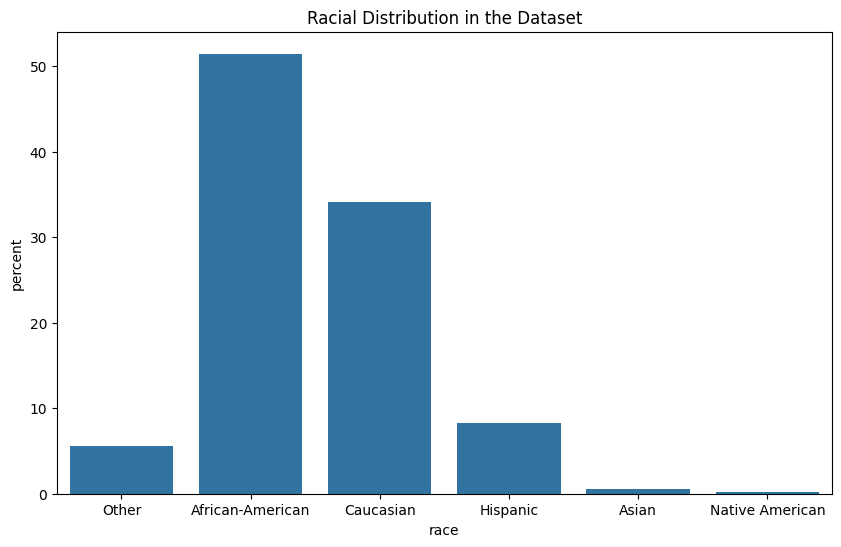

In [5]:
# Let us first check the distribution of the race variable
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='race', stat='percent')
plt.title('Racial Distribution in the Dataset')
plt.show()

More than 80% of the sample population is either African American or White/Caucasian. In the following we will restrict the dataset to those two races.

In [ ]:
# Restrict the dataset to Afro-Americans and Caucasians
data = data[(data['race'] == "African-American") | (data['race'] == "Caucasian")  ]

## ***Question:***
*Which of the attributes might be considered sensitive?*


## **Data exploration**

In order to answer such question, we commence by exploring the data.

Text(0.5, 1.0, 'Score Text vs. Violent Recidivism')

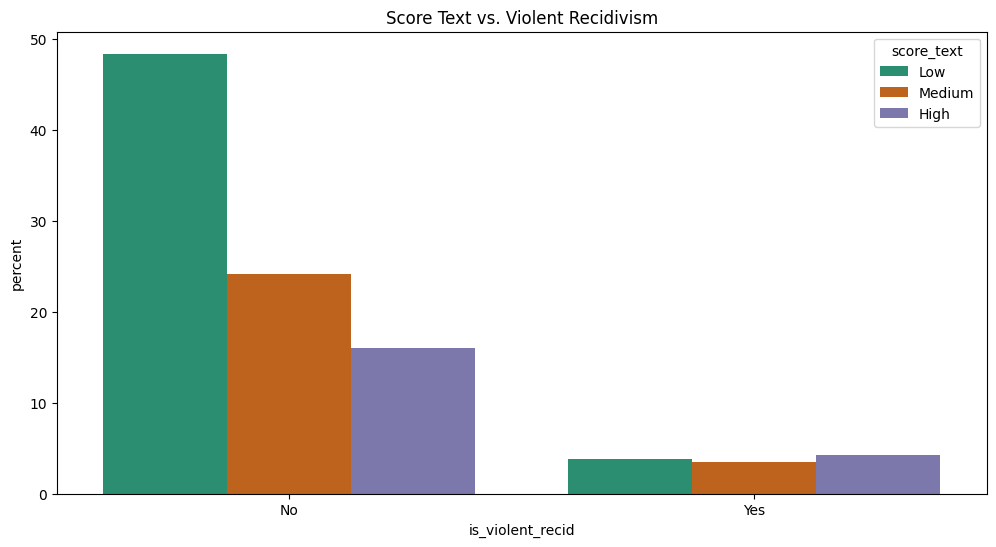

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data, x='is_violent_recid', hue='score_text', palette='Dark2', stat='percent', dodge=True)
plt.xlabel('is_violent_recid')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Score Text vs. Violent Recidivism')

## ***Question:***
*Based on the depicted histogram, would you consider the COMPAS risk score a good predictor for violent recidivism?*

#### Comments about the COMPAS Score Text vs. Violent Recidivism

The plot above shows the distribution of COMPAS risk scores (Low, Medium, High) in relation to violent recidivism (whether the individual committed a violent crime again or not).

#### Observations:
1. **High Risk Scores and Violent Recidivism**:
    - The proportion of individuals with a High risk score who did not commit violent recidivism is relatively small.
    - Similarly, the proportion of individuals with a High risk score who did commit violent recidivism is even smaller.

2. **Low Risk Scores and Violent Recidivism**:
    - A substantial majority of individuals with Low risk scores did not commit violent recidivism.
    - However, there are still a few individuals with Low risk scores who did commit violent recidivism.

#### Insights:
- **Potential Bias**: The distribution indicates that the COMPAS algorithm might over-predict the likelihood of violent recidivism for certain groups. For instance, the High risk score category includes many individuals who did not recidivate violently, which could point to a bias in the risk assessment.

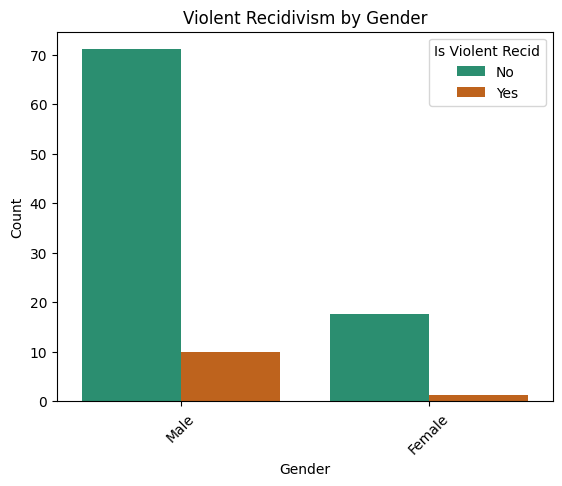

In [6]:
figsize = (12, 6)
sns.countplot(data=data, x='sex', hue='is_violent_recid', palette='Dark2', stat='percent', dodge=True)
plt.title("Violent Recidivism by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Is Violent Recid', labels=['No', 'Yes'])
plt.show()

## ***Question:***
*Would you consider gender as an unbiased feature of your model?*

#### Comments about Violent Recidivism by Gender

The plot above shows the distribution of violent recidivism across genders.

#### Observations:
1. **Gender Distribution and Recidivism**:
    - The number of male individuals in the dataset is higher than the number of female individuals.
    - A significant majority of male individuals did not commit violent recidivism.
    - Similarly, the majority of female individuals also did not commit violent recidivism.

2. **Male vs. Female Recidivism Rates**:
    - Among males, the proportion of those who committed violent recidivism is small compared to those who did not. This suggests that violent recidivism is relatively infrequent among male individuals in this dataset.
    - Among females, the proportion of those who committed violent recidivism is even smaller. This indicates that violent recidivism is less common among female individuals compared to males.

3. **Overall Trends**:
    - The plot suggests that violent recidivism is a relatively rare event in the dataset, particularly among females.
    - The low counts of violent recidivism for both genders highlight the challenges in predicting such events accurately and the importance of considering gender-specific factors in risk assessment models.

#### Insights:
- **Gender-Specific Bias**: The data suggests that the COMPAS algorithm might overestimate the risk of violent recidivism for males if it does not account for gender-specific factors. This could lead to unfair treatment of male individuals in the criminal justice system.
- **Need for Gender-Sensitive Models**: The clear difference in recidivism rates between genders indicates the need for risk assessment models to be sensitive to gender differences to ensure fair and accurate data.

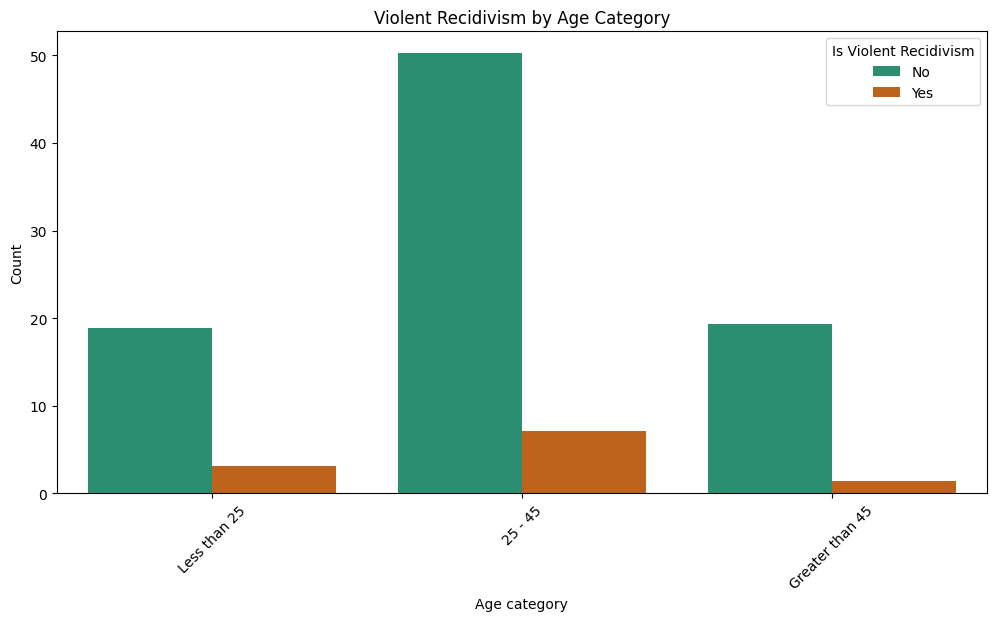

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='age_cat', hue='is_violent_recid' , palette='Dark2', stat='percent', dodge=True, order=['Less than 25', '25 - 45', 'Greater than 45'])
plt.title("Violent Recidivism by Age Category")
plt.xlabel("Age category")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(title='Is Violent Recidivism', labels=['No', 'Yes'])
plt.show()

## ***Question:***
*Would you consider age classification as good predictor of your model?*

#### Comments about Violent Recidivism by Age Category

The plot above shows the distribution of violent recidivism (whether the individual committed a violent crime again or not) across different age categories (Less than 25, 25-45, Greater than 45).

#### Observations:
1. **Age Distribution and Recidivism**:
    - The majority of individuals in the dataset fall within the 25-45 age category.
    - The "Less than 25" and "Greater than 45" categories have fewer individuals compared to the 25-45 category.

2. **Recidivism Rates by Age Category**:
    - In the "Less than 25" age category, a small number of individuals committed violent recidivism compared to those who did not.
    - In the "25-45" age category, the number of individuals who did not commit violent recidivism is significantly higher than those who did. However, this category has the highest count of individuals who committed violent recidivism compared to the other age groups.
    - In the "Greater than 45" age category, very few individuals committed violent recidivism, and the majority did not.

3. **Overall Trends**:
    - Violent recidivism is relatively rare across all age categories.
    - The "25-45" age category has the highest absolute number of violent recidivism cases, but this is also the largest age group in the dataset.

#### Insights:
- **Age-Specific Bias**: The data suggests that the COMPAS algorithm might need to account for age-specific factors when predicting violent recidivism. Younger individuals and those in the 25-45 age category show some instances of violent recidivism, while older individuals (Greater than 45) show very few.
- **Predictive Accuracy by Age**: The accuracy of data might vary significantly across different age categories. The algorithm should be evaluated separately for each age group to ensure it performs well across all ages.

## ***Question:***
*Considering the distribution of the data, what might be the implications when training a ML model with this data?*

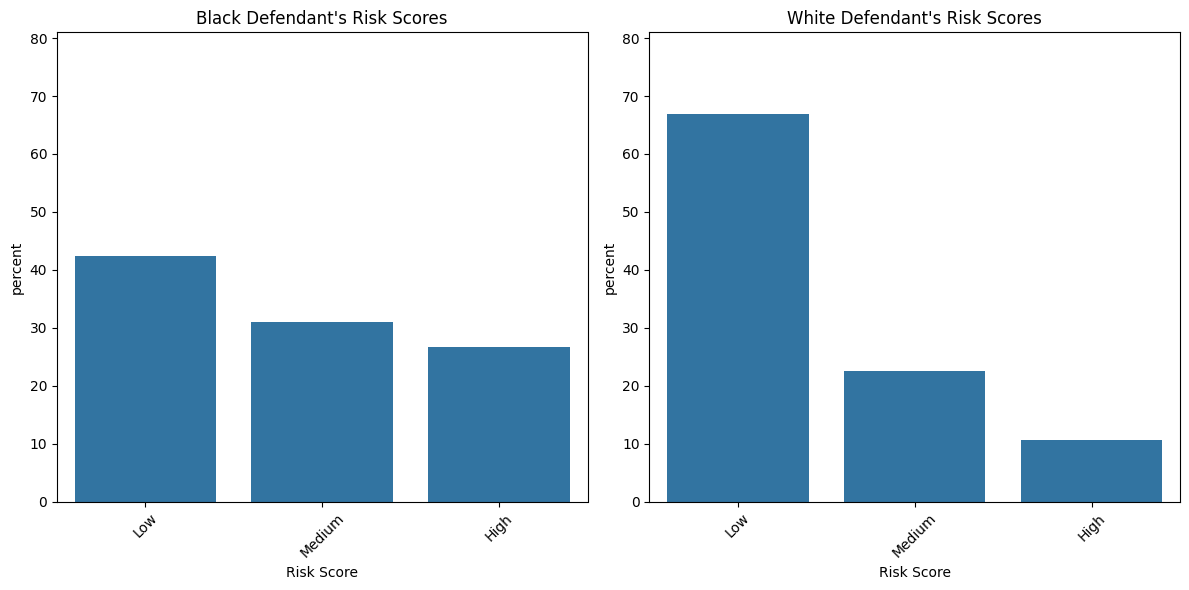

In [ ]:
# Filtering data by race
df_black = data[data['race'] == "African-American"]
df_white = data[data['race'] == "Caucasian"]
score = 'score_text'

# Setting the size of the plot
plt.figure(figsize=(12, 6))

# Plot for Black defendants
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(x=score, data=df_black, order=['Low','Medium','High'], stat='percent')
plt.ylim(0, 81)
plt.xticks(rotation=45)
plt.title("Black Defendant's Risk Scores")
plt.xlabel("Risk Score")

# Plot for White defendants
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(x=score, data=df_white, order=['Low','Medium','High'], stat='percent')
plt.ylim(0, 81)
plt.xticks(rotation=45)
plt.title("White Defendant's Risk Scores")
plt.xlabel("Risk Score")

plt.tight_layout()
plt.show()

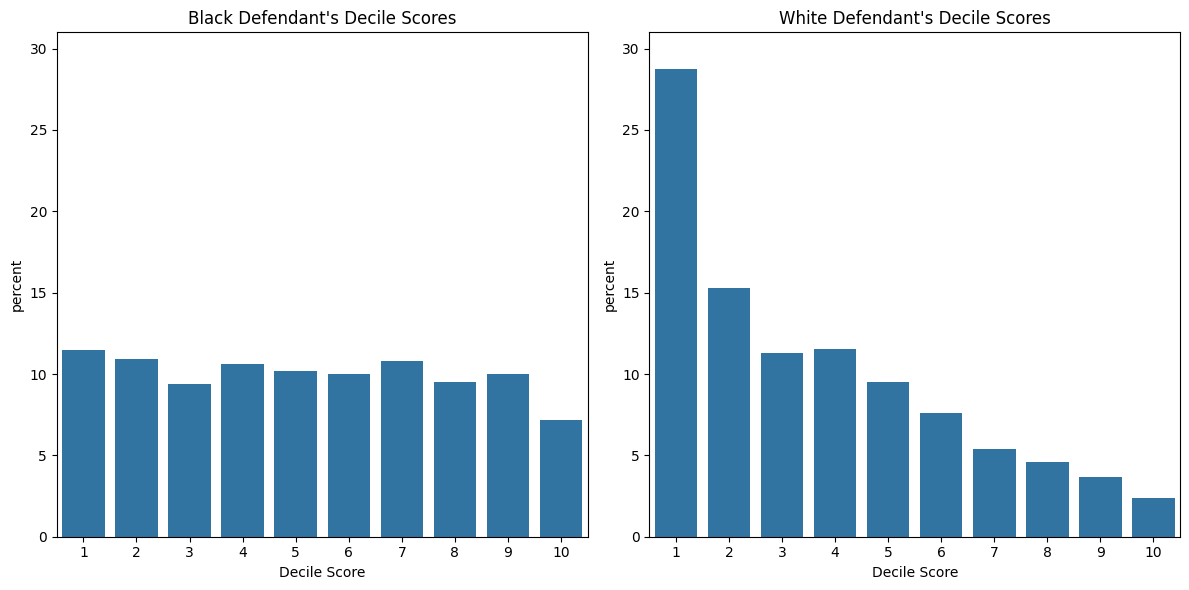

In [ ]:
# Setting the size of the plot
plt.figure(figsize=(12, 6))

# Plot for Black defendants
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(x='decile_score', data=df_black, order=sorted(data['decile_score'].unique()), stat='percent')
plt.ylim(0, 31)
plt.title("Black Defendant's Decile Scores")
plt.xlabel("Decile Score")

# Plot for White defendants
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(x='decile_score', data=df_white, order=sorted(df_white['decile_score'].unique()), stat='percent')
plt.ylim(0, 31)
plt.title("White Defendant's Decile Scores")
plt.xlabel("Decile Score")

plt.tight_layout()
plt.show()

### Comments about Decile Scores by Race

The plots above show the distribution of COMPAS decile scores for Black and White defendants. Decile scores range from 1 to 10, with higher scores indicating a higher risk of recidivism (1 being low risk).

#### Observations:
1. **Distribution of Decile Scores for Black Defendants**:
    - The decile scores for Black defendants are relatively evenly distributed across the range, with each decile score representing roughly 8-12% of the population.
    - There is no single decile score that dominates the distribution for Black defendants.

2. **Distribution of Decile Scores for White Defendants**:
    - The decile scores for White defendants show a different pattern, with a significant concentration in the lower deciles.
    - A large proportion of White defendants have decile scores of 1 or 2, indicating a lower assessed risk of recidivism.
    - Higher decile scores (7-10) are less frequent among White defendants compared to Black defendants.

3. **Comparative Trends**:
    - The distribution of decile scores suggests that Black defendants are more likely to be assigned higher risk scores compared to White defendants.
    - This disparity indicates potential racial bias in the COMPAS risk assessment algorithm, with Black defendants being assessed as higher risk more often than White defendants.

#### Insights:
- **Potential Racial Bias**: The differences in decile score distributions highlight a potential racial bias in the COMPAS algorithm. Black defendants are more likely to be assigned higher risk scores, which can have significant implications for their treatment in the criminal justice system.
- **Impact on Decision Making**: Higher decile scores can lead to more severe legal consequences, such as higher bail amounts, longer sentences, or reduced chances of parole. This disparity in risk assessment can contribute to systemic inequalities.

## ***Question:***
*Based on the collected insights, how 'fair' is to claim that high-risk-classified black people have a higher probability to commit violent recidivism?*

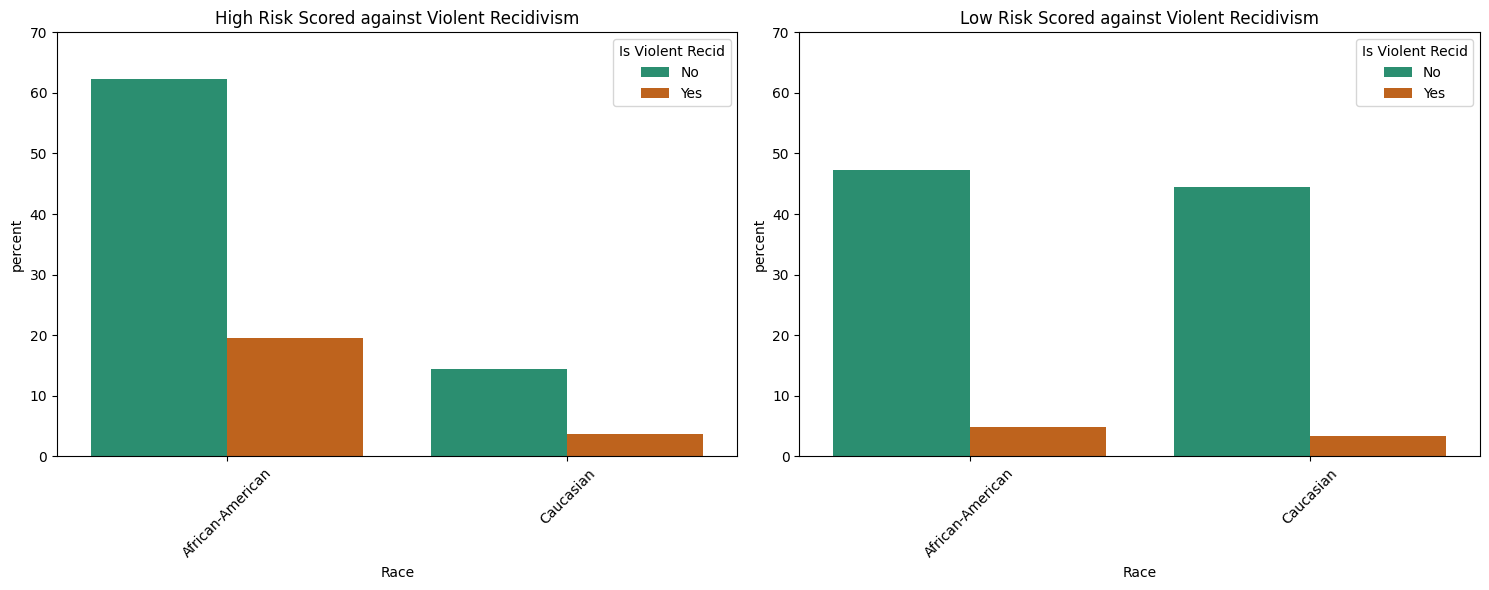

In [ ]:
recid = 'is_violent_recid'
score = 'v_score_text'

# Plot gender distribution across race
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, second subplot
sns.countplot(data[data[score] == "High"], x='race', hue=recid, palette='Dark2', stat='percent', dodge=True)
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.ylim(0, 70)
plt.legend(title='Is Violent Recid', labels=['No', 'Yes'])
plt.title('High Risk Scored against Violent Recidivism')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(data[data[score] == "Low"], x='race', hue=recid, palette='Dark2', stat='percent', dodge=True)
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.ylim(0, 70)
plt.legend(title='Is Violent Recid', labels=['No', 'Yes'])
plt.title('Low Risk Scored against Violent Recidivism')

plt.tight_layout()

### Comments about High and Low Risk Scores against Violent Recidivism by Race

The plots above show the percentage of defendants who were assigned High and Low risk scores by the COMPAS algorithm and their subsequent violent recidivism rates.

#### Observations:
1. **High Risk Scores (Left Plot)**:
    - For African-American defendants assigned a High risk score, the majority (about 60%) did not commit violent recidivism. Approximately 20% did commit violent recidivism.
    - For Caucasian defendants assigned a High risk score, the percentage of those who did not commit violent recidivism is lower compared to African-American defendants. The percentage of those who did commit violent recidivism is also lower.

2. **Low Risk Scores (Right Plot)**:
    - For African-American defendants assigned a Low risk score, a substantial majority did not commit violent recidivism. A very small percentage did commit violent recidivism.
    - For Caucasian defendants assigned a Low risk score, the pattern is similar, with the majority not committing violent recidivism and a small percentage committing violent recidivism.

3. **Comparative Trends**:
    - Both African-American and Caucasian defendants who were assigned Low risk scores had a high percentage of non-recidivism and a low percentage of violent recidivism, indicating that the algorithm was relatively accurate in predicting low risk for both groups.
    - Among those assigned High risk scores, African-American defendants had a higher percentage of non-recidivism compared to Caucasian defendants, suggesting a potential overestimation of risk for African-American defendants.

#### Insights:
- **Potential Overestimation of Risk for African-Americans**: The higher percentage of African-American defendants assigned High risk scores who did not recidivate suggests that the COMPAS algorithm may overestimate the risk for this group. This could lead to disproportionately harsher treatment in the criminal justice system for African-American defendants.
- **Predictive Accuracy**: The plots indicate that the COMPAS algorithm's predictive accuracy varies between High and Low risk categories. It appears more accurate in predicting non-recidivism for Low risk scores across both racial groups.

## ***Question:***
*What could be other attributes that influence the probability of recidivate?*

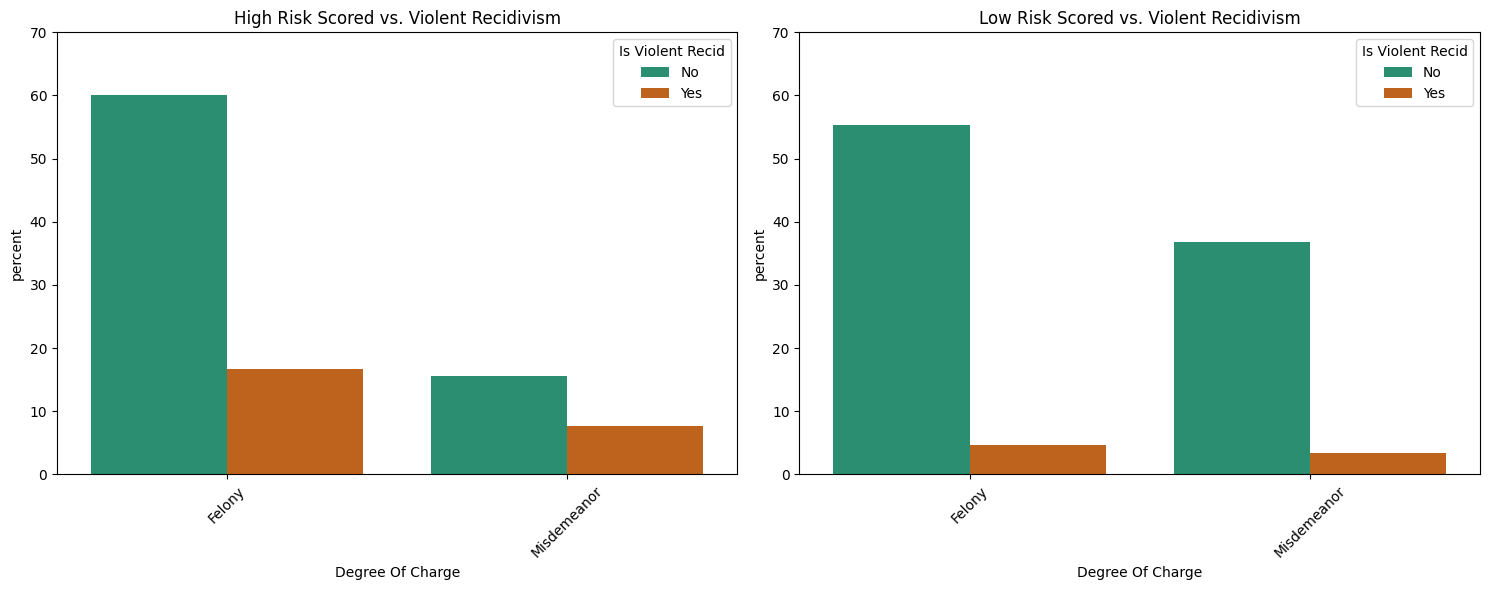

In [7]:
recid = 'is_violent_recid'
score = 'v_score_text'

# Plot gender distribution across race
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, second subplot
sns.countplot(data[data[score] == "High"], x='c_charge_degree', hue=recid, palette='Dark2', stat='percent', dodge=True)
plt.xlabel("Degree Of Charge")
plt.xticks([0,1],["Felony","Misdemeanor"], rotation=45)
plt.ylim(0, 70)
plt.legend(title='Is Violent Recid', labels=['No', 'Yes'])
plt.title('High Risk Scored vs. Violent Recidivism')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(data[data[score] == "Low"], x='c_charge_degree', hue=recid, palette='Dark2', stat='percent', dodge=True)
plt.xlabel("Degree Of Charge")
plt.xticks([0,1],["Felony","Misdemeanor"], rotation=45)
plt.ylim(0, 70)
plt.legend(title='Is Violent Recid', labels=['No', 'Yes'])
plt.title('Low Risk Scored vs. Violent Recidivism')

plt.tight_layout()

### Comments about Degree of Charge vs. Violent Recidivism

#### Observations:
1. **High Risk Scores (Left Plot)**:
    - For individuals with felony charges assigned a High risk score, a significant proportion did not commit violent recidivism.
    - A smaller proportion of individuals with felony charges assigned a High risk score did commit violent recidivism.
    - For individuals with misdemeanor charges assigned a High risk score, the majority did not commit violent recidivism, with a very small proportion committing violent recidivism.

2. **Low Risk Scores (Right Plot)**:
    - For individuals with felony charges assigned a Low risk score, the majority did not commit violent recidivism.
    - A small proportion of individuals with felony charges assigned a Low risk score did commit violent recidivism.
    - Similarly, for individuals with misdemeanor charges assigned a Low risk score, the majority did not commit violent recidivism, with a very small proportion committing violent recidivism.

#### Insights:
- **Potential Overestimation for High Risk Scores**: The proportion of High risk individuals with felony charges who did not commit violent recidivism suggests potential overestimation of risk by the algorithm.
- **Consistency Across Charge Types**: The pattern of predictions is consistent across both felony and misdemeanor charges, indicating that the degree of charge might not be the sole factor influencing the algorithm's predictions.

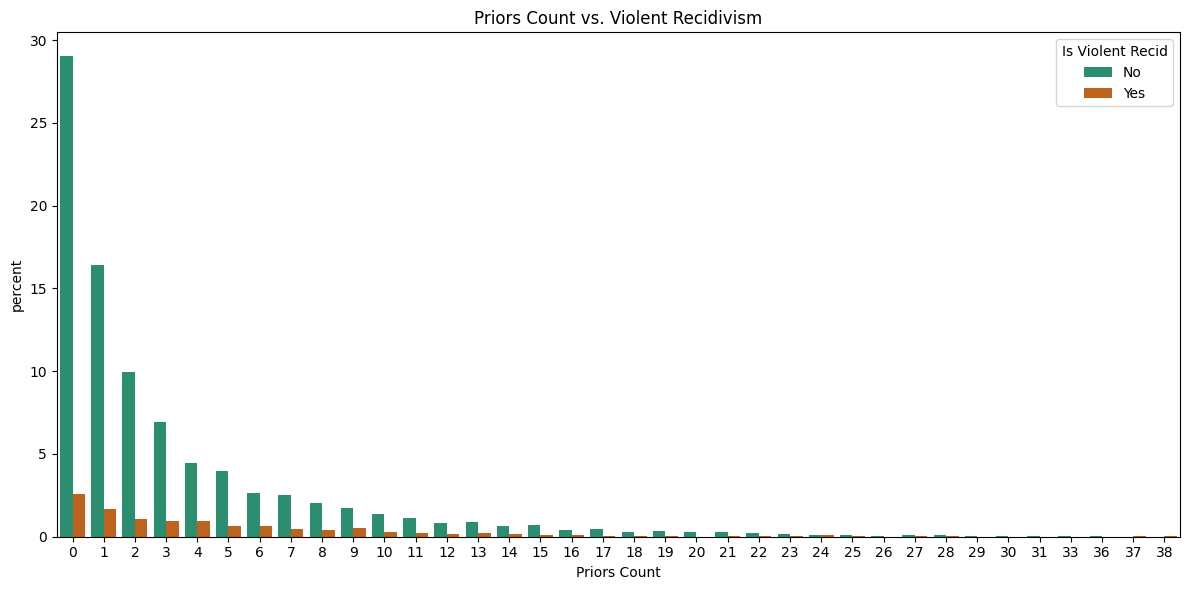

In [ ]:
# Plot gender distribution across race
plt.figure(figsize=(12, 6))

sns.countplot(data, x='priors_count', hue='is_violent_recid', palette='Dark2', stat='percent', dodge=True)
plt.xlabel("Priors Count")
plt.legend(title='Is Violent Recid', labels=['No', 'Yes'])
plt.title('Priors Count vs. Violent Recidivism')

plt.tight_layout()

### Comments about Priors Count vs. Violent Recidivism

#### Observations:
1. **Low Priors Count**:
    - Individuals with a low number of prior offenses (0-5) predominantly did not commit violent recidivism.
    - The likelihood of violent recidivism is relatively low for these individuals.
    - Amont the people that did commit violent recidivism, it can be appreciated a decreasing trend as the number of priors increases.

2. **High Priors Count**:
    - As the number of prior offenses increases, the proportion of individuals who commit violent recidivism decreases.

#### Insights:
- **Influence of Prior Offenses**: The number of prior offenses appears to have some correlation with violent recidivism. Individuals with more priors are less likely to re-offend violently, but the majority still do not.

While priors count is a relevant factor, relying solely on it to predict violent recidivism may not be sufficient. It should be considered alongside other factors for a more comprehensive risk assessment.

## **Optional: Define New Attributes**

In this section, we investigate the possibility of extracting new information based on the provided features.

In [ ]:
# Define length of stay in jail

# Convert the date columns to datetime format
data['c_jail_in'] = pd.to_datetime(data['c_jail_in'])
data['c_jail_out'] = pd.to_datetime(data['c_jail_out'])

# Calculate the length of stay
data['length_of_stay'] = (data['c_jail_out'] - data['c_jail_in']).dt.days

In [ ]:
# Define the function to categorize length_of_stay
def categorize_length_of_stay(days):
    if days < 30:
        return 'less 1 month'
    elif 30 <= days <= 365:
        return '1 month - 1 year'
    else:
        return 'more than 1 year'

# Apply the function to create the new column in the dataset
data['c_length_of_stay'] = data['length_of_stay'].apply(categorize_length_of_stay)

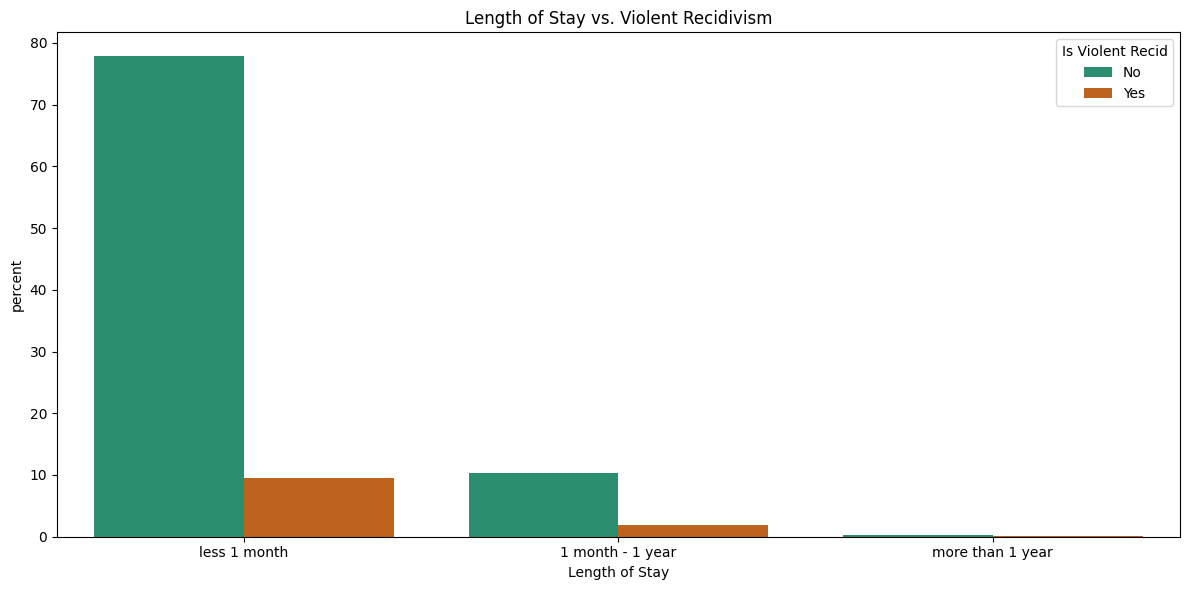

In [ ]:
# Plot length of stay against is_violent_recid
plt.figure(figsize=(12, 6))

sns.countplot(data, x='c_length_of_stay', hue='is_violent_recid', palette='Dark2', stat='percent', dodge=True)
plt.xlabel("Length of Stay")
plt.legend(title='Is Violent Recid', labels=['No', 'Yes'])
plt.title('Length of Stay vs. Violent Recidivism')

plt.tight_layout()

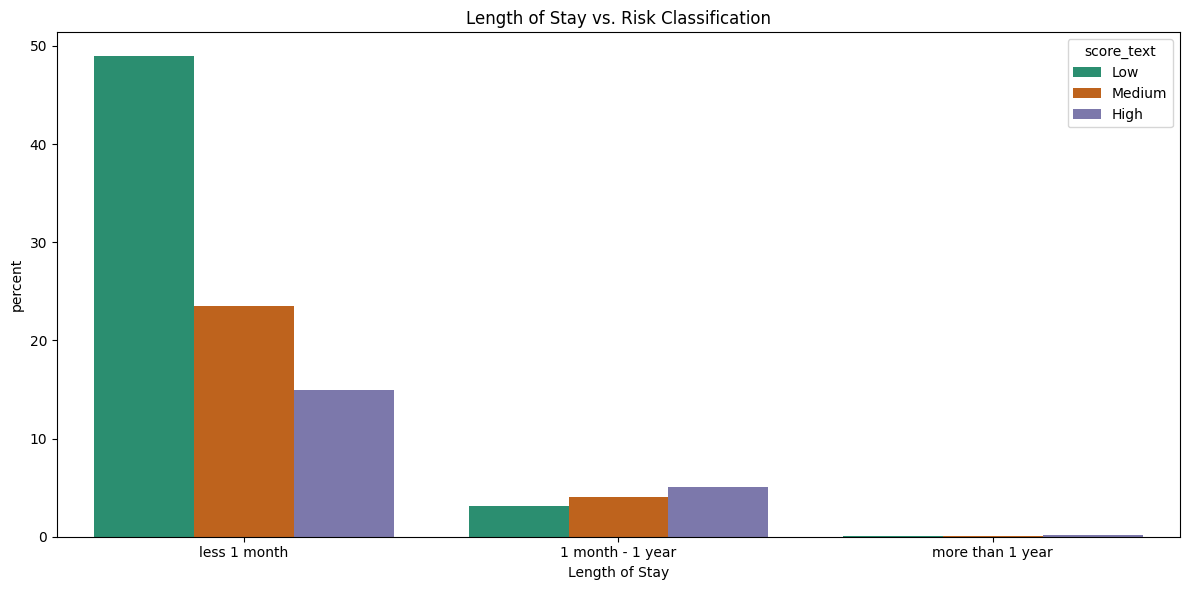

In [ ]:
# Plot gender distribution across race
plt.figure(figsize=(12, 6))

sns.countplot(data, x='c_length_of_stay', hue='score_text', palette='Dark2', stat='percent', dodge=True)
plt.xlabel("Length of Stay")
plt.title('Length of Stay vs. Risk Classification')

plt.tight_layout()

In [ ]:
# Add here your newly generated features..

